In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [182]:
path = '/home/thayyeb/Desktop/Project/promotion/train.csv'
df = pd.read_csv(path)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [3]:
df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

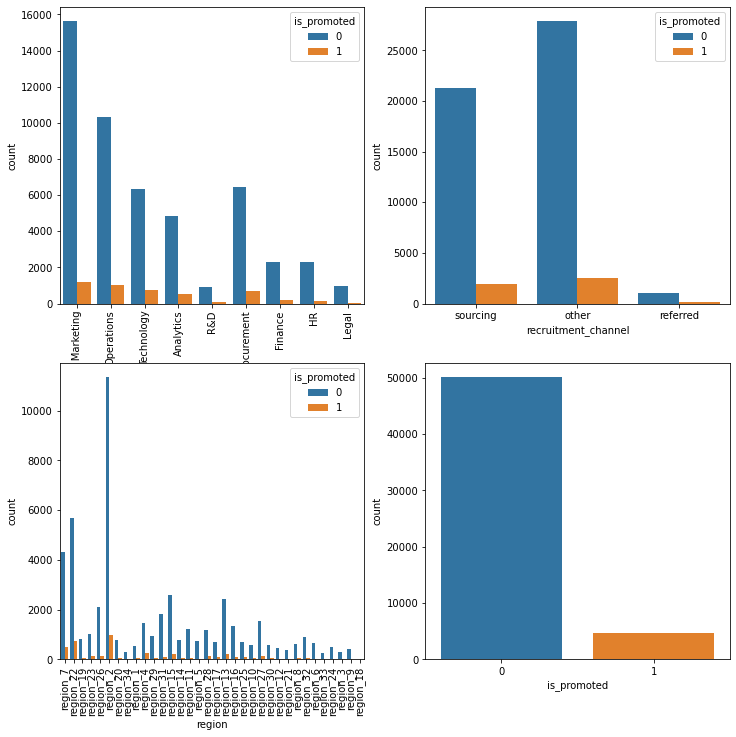

In [4]:
fig, ax = plt.subplots(2,2,figsize=(12,12))

plt.sca(ax[0][0])
sns.countplot(x = 'department', hue='is_promoted',data=df)
plt.xticks(rotation = 90)

plt.sca(ax[0][1])
sns.countplot(x = 'recruitment_channel', hue='is_promoted',data=df)

plt.sca(ax[1][0])
sns.countplot(x = 'region', hue='is_promoted',data=df)
plt.xticks(rotation = 90)

plt.sca(ax[1][1])
sns.countplot(x = 'is_promoted', data = df)

In [5]:
total_promotionstatus_count = [x for x in df['is_promoted'].value_counts()]
gender_notpromoted_count = [x for x in df['gender'][df['is_promoted']==0].value_counts()]
gender_promoted_count = [x for x in df['gender'][df['is_promoted']==1].value_counts()]
gender_count_arr = gender_notpromoted_count + gender_promoted_count

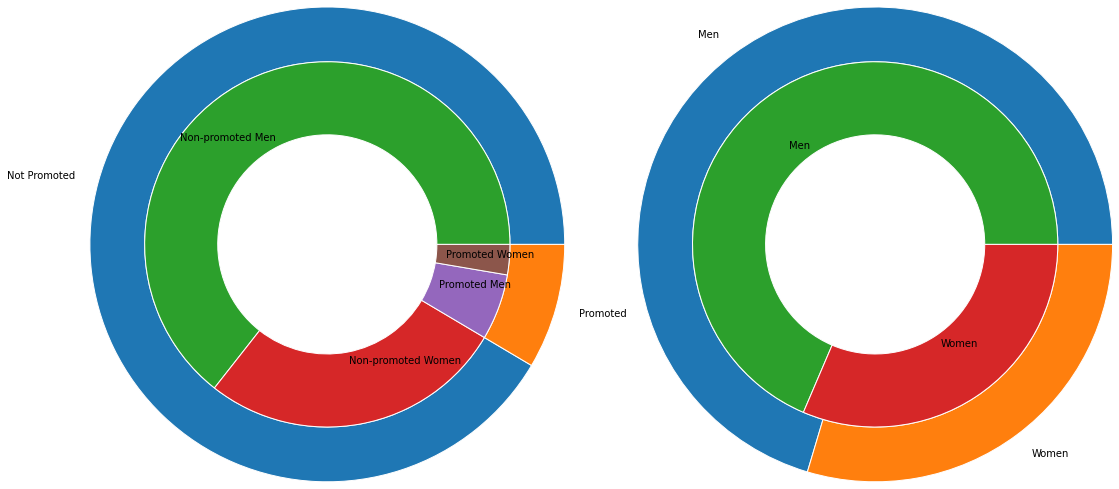

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18,18))
ax1.axis = 'equal'
mypie1,_ = ax1.pie(total_promotionstatus_count, radius = 1.3, labels = ["Not Promoted", "Promoted"])
plt.setp( mypie1, width=0.3, edgecolor='white')

mypie2,_ = ax1.pie(gender_count_arr, radius = 1.3-0.3, labels = ["Non-promoted Men","Non-promoted Women","Promoted Men", "Promoted Women"], labeldistance = 0.65)
plt.setp( mypie2, width=0.4, edgecolor='white')

ax2.axis = 'equal'
mypie1,_ = ax2.pie(gender_notpromoted_count, radius = 1.3, labels = ["Men", "Women"])
plt.setp( mypie1, width=0.3, edgecolor='white')

mypie2,_ = ax2.pie(gender_promoted_count, radius = 1.3-0.3, labels = ["Men", "Women"], labeldistance=0.65)
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.show()

In [186]:
df.drop(['employee_id','region', 'recruitment_channel', 'department', 'gender'], axis = 1, inplace = True)

In [187]:
df.isna().sum()

education               2409
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
total_training_score       0
tenure                     0
last_year                  0
dtype: int64

In [188]:
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])
df.isna().sum()

education               0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
total_training_score    0
tenure                  0
last_year               0
dtype: int64

In [189]:
df.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,total_training_score,tenure,last_year
0,3.0,1,35,5.0,8,0,49,0,49,27,49
1,2.0,1,30,5.0,4,0,60,0,60,26,60
2,2.0,1,34,3.0,7,0,50,0,50,27,50
3,2.0,2,39,1.0,10,0,50,0,100,29,100
4,2.0,1,45,3.0,2,0,73,0,73,43,73


In [190]:
df['total_training_score'] = df['avg_training_score']*df['no_of_trainings']
df['tenure'] = df['age']-df['length_of_service'] 
df['last_year'] = df['awards_won?']*df['no_of_trainings']+df['total_training_score']

In [191]:
df.replace(("Below Secondary","Bachelor's","Master's & above" ),(1,2,3), inplace = True)

In [192]:
X = df.drop('is_promoted',axis=1)
y = df['is_promoted']
X

,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,total_training_score,tenure,last_year
0,3.0,1,35,5.0,8,0,49,49,27,49
1,2.0,1,30,5.0,4,0,60,60,26,60
2,2.0,1,34,3.0,7,0,50,50,27,50
3,2.0,2,39,1.0,10,0,50,100,29,100
4,2.0,1,45,3.0,2,0,73,73,43,73
...,...,...,...,...,...,...,...,...,...,...
54803,2.0,1,48,3.0,17,0,78,78,31,78
54804,3.0,1,37,2.0,6,0,56,56,31,56
54805,2.0,1,27,5.0,3,0,79,79,24,79
54806,2.0,1,29,1.0,2,0,45,45,27,45


<AxesSubplot:>

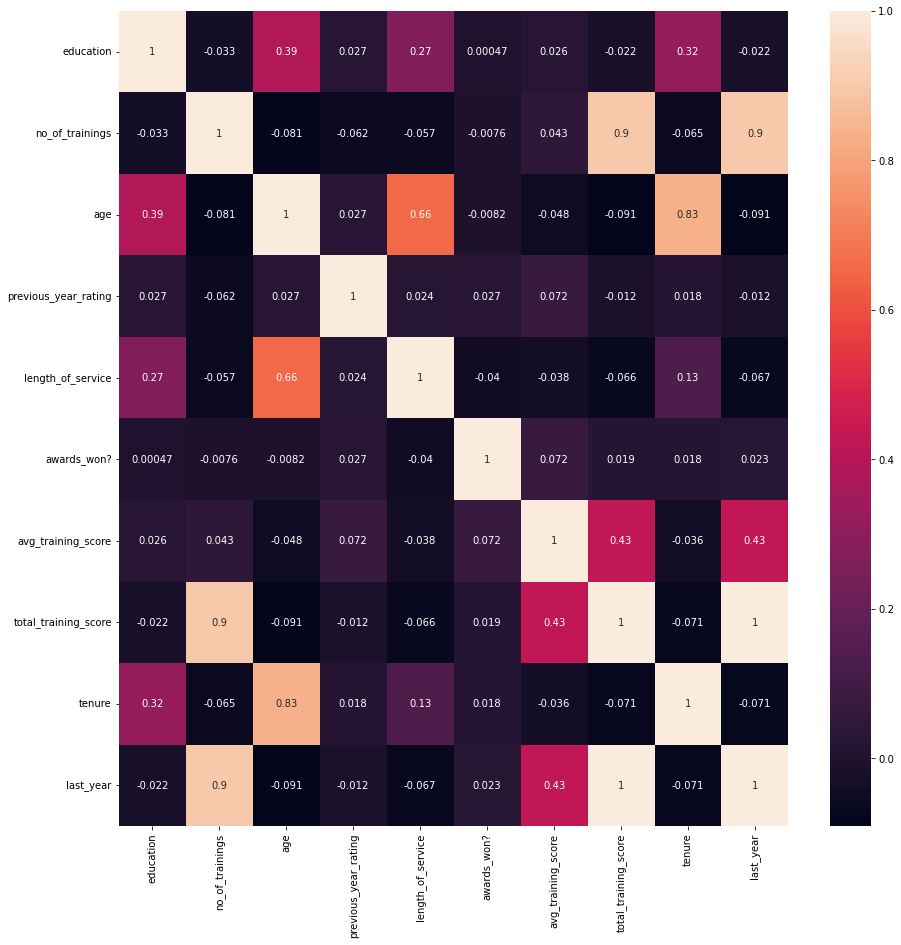

In [193]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True)

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_test

,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,total_training_score,tenure,last_year
49159,3.0,1,35,1.0,3,0,79,79,32,79
2731,2.0,2,33,4.0,7,0,46,92,26,92
23320,2.0,1,31,5.0,6,0,67,67,25,67
45864,2.0,1,30,2.0,5,0,57,57,25,57
5673,2.0,1,27,3.0,1,0,79,79,26,79
...,...,...,...,...,...,...,...,...,...,...
31887,2.0,1,52,3.0,3,0,52,52,49,52
47026,2.0,1,32,3.0,7,0,87,87,25,87
53816,2.0,1,36,5.0,7,0,46,46,29,46
49661,2.0,1,39,3.0,11,0,83,83,28,83


In [196]:
from imblearn.over_sampling import SMOTE

In [197]:
X_resample, y_resample = SMOTE().fit_resample(X_train,y_train.values.ravel())

In [198]:
y_train.value_counts(),pd.DataFrame(y_resample).value_counts()

(0    37626
 1     3480
 Name: is_promoted, dtype: int64,
 0    37626
 1    37626
 dtype: int64)

In [199]:
from sklearn.preprocessing import StandardScaler

In [200]:
scale = StandardScaler()
df_scaled = scale.fit_transform(X_resample)
X_test = scale.transform(X_test)
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9
0,1.594077,-0.408645,0.084151,-2.285090,-0.642210,-0.158404,0.842374,-0.085463,0.609178,-0.086978
1,-0.616823,1.353609,-0.191033,0.360559,0.347648,-0.158404,-1.435009,0.208206,-0.481932,0.206394
2,-0.616823,-0.408645,-0.466218,1.242441,0.100183,-0.158404,0.014235,-0.356542,-0.663783,-0.357783
3,-0.616823,-0.408645,-0.603810,-1.403207,-0.147281,-0.158404,-0.675881,-0.582442,-0.663783,-0.583453
4,-0.616823,-0.408645,-1.016587,-0.521324,-1.137139,-0.158404,0.842374,-0.085463,-0.481932,-0.086978
...,...,...,...,...,...,...,...,...,...,...
13697,-0.616823,-0.408645,2.423219,-0.521324,-0.642210,-0.158404,-1.020940,-0.695391,3.700657,-0.696289
13698,-0.616823,-0.408645,-0.328626,-0.521324,0.347648,-0.158404,1.394467,0.095256,-0.663783,0.093559
13699,-0.616823,-0.408645,0.221743,1.242441,0.347648,-0.158404,-1.435009,-0.830931,0.063623,-0.831691
13700,-0.616823,-0.408645,0.634520,-0.521324,1.337506,-0.158404,1.118421,0.004897,-0.118228,0.003290


RandomForestClassifier 

In [201]:
from sklearn.ensemble import RandomForestClassifier 

In [202]:
rf = RandomForestClassifier(n_estimators =500 )
rf.fit(df_scaled, y_resample)

RandomForestClassifier(n_estimators=500)

In [203]:
y_pred = rf.predict(X_test)

In [204]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [205]:
def metric_scores(pred):
    print(f"ROC AUC: {roc_auc_score(y_test, pred)*100:.2f}")
    print(f"ACC SCORE: {accuracy_score(y_test, pred)*100:.2f}")
    print(f"CONFUSION MATRIX: {confusion_matrix(y_test, pred)}")
    print(f"CLASSIFICATION REPORT: {classification_report(y_test, pred)}")

In [206]:
metric_scores(y_pred)

ROC AUC: 58.29
ACC SCORE: 86.91
CONFUSION MATRIX: [[11628   886]
 [  907   281]]
CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.93      0.93      0.93     12514
           1       0.24      0.24      0.24      1188

    accuracy                           0.87     13702
   macro avg       0.58      0.58      0.58     13702
weighted avg       0.87      0.87      0.87     13702



Logistic Regression 

In [207]:
from sklearn.linear_model import LogisticRegression

In [208]:
lr = LogisticRegression()

In [209]:
X_train

,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,total_training_score,tenure,last_year
6662,3.0,1,39,5.0,11,0,55,55,28,55
26835,2.0,1,30,3.0,1,0,59,59,29,59
40278,3.0,1,30,3.0,6,0,84,84,24,84
12154,2.0,1,53,5.0,12,0,54,54,41,54
27965,2.0,2,28,5.0,4,0,87,174,24,174
...,...,...,...,...,...,...,...,...,...,...
28574,3.0,1,35,1.0,6,0,48,48,29,48
46131,3.0,2,35,2.0,3,0,78,156,32,156
46363,2.0,1,20,5.0,2,0,48,48,18,48
48109,2.0,1,30,4.0,4,0,58,58,26,58


In [210]:
lr.fit(df_scaled,y_resample)
y_pred = lr.predict(X_test)

In [213]:
metric_scores(y_pred)

ROC AUC: 66.81
ACC SCORE: 75.70
CONFUSION MATRIX: [[9707 2807]
 [ 522  666]]
CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.95      0.78      0.85     12514
           1       0.19      0.56      0.29      1188

    accuracy                           0.76     13702
   macro avg       0.57      0.67      0.57     13702
weighted avg       0.88      0.76      0.80     13702



In [163]:
from sklearn.ensemble import ExtraTreesClassifier 

In [164]:
etc = ExtraTreesClassifier()
etc.fit(X,y)

ExtraTreesClassifier()

<AxesSubplot:>

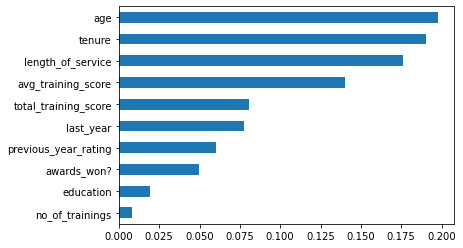

In [165]:
features = pd.Series(etc.feature_importances_,index = X.columns)
features.sort_values().plot(kind = 'barh')

AutoEval 

In [219]:
import evalml
from evalml import AutoMLSearch

In [220]:
df = pd.read_csv(path)
X = df.drop('is_promoted', axis= 1)
y = df['is_promoted']

In [223]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, test_size = 0.2, problem_type = 'binary')

In [224]:
automl = AutoMLSearch(X_train, y_train, problem_type = 'binary', objective = 'AUC')
automl.search()

In [225]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,6,LightGBM Classifier w/ Label Encoder + Select ...,6,0.804301,0.004831,0.804301,30.430104,False,"{'Label Encoder': {'positive_label': None}, 'N..."
1,10,XGBoost Classifier w/ Label Encoder + Select C...,10,0.803853,0.004601,0.803853,30.385286,False,"{'Label Encoder': {'positive_label': None}, 'N..."
2,1,Logistic Regression Classifier w/ Label Encode...,1,0.784784,0.006009,0.784784,28.478353,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,8,Elastic Net Classifier w/ Label Encoder + Sele...,8,0.783934,0.006674,0.783934,28.393433,False,"{'Label Encoder': {'positive_label': None}, 'N..."
4,4,Random Forest Classifier w/ Label Encoder + Im...,4,0.782521,0.009079,0.782521,28.252107,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,7,Extra Trees Classifier w/ Label Encoder + Sele...,7,0.782449,0.010336,0.782449,28.244892,False,"{'Label Encoder': {'positive_label': None}, 'N..."
6,2,Random Forest Classifier w/ Label Encoder + Im...,2,0.779776,0.007635,0.779776,27.977650,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,11,Stacked Ensemble Classification Pipeline,11,0.771752,0.002393,0.771752,27.175161,False,"{'Label Encoder': {'positive_label': None}, 'L..."
8,3,Logistic Regression Classifier w/ Label Encode...,3,0.766233,0.010070,0.766233,26.623300,False,"{'Label Encoder': {'positive_label': None}, 'I..."
9,9,CatBoost Classifier w/ Label Encoder + Select ...,9,0.737489,0.005193,0.737489,23.748932,False,"{'Label Encoder': {'positive_label': None}, 'N..."


In [228]:
automl.best_pipeline.score(X_test, y_test, objectives = ['AUC'])

OrderedDict([('AUC', 0.8115389863414559)])

In [230]:
automl.describe_pipeline(automl.rankings.iloc[0]['id'])


*************************************************************************************************************************************************************************************************************************************************************
* LightGBM Classifier w/ Label Encoder + Select Columns By Type Transformer + Label Encoder + Imputer + One Hot Encoder + Undersampler + Select Columns Transformer + Select Columns Transformer + Label Encoder + Imputer + One Hot Encoder + Undersampler *
*************************************************************************************************************************************************************************************************************************************************************

Problem Type: binary
Model Family: LightGBM

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Select Columns By Type Transformer
	 * column_types : ['category']
	 * exclude : True
3. Label Encoder
	 * positive_label : None
4